In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data)

In [2]:
data = pd.DataFrame(iris.data)
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

iris_df


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
print(iris_df)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


Splitting training:test -> 8:2

In [5]:
#split in 8:2 train:test
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(iris_df, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")


No. of training examples: 120
No. of testing examples: 30


Now SVM

In [6]:
x, y = iris.data, iris.target

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [8]:

!pip install scikit-learn==0.22.2

ERROR: Could not find a version that satisfies the requirement scikit-learn==0.22.2 (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0b1, 0.15.0b2, 0.15.0, 0.15.1, 0.15.2, 0.16b1, 0.16.0, 0.16.1, 0.17b1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19b2, 0.19.0, 0.19.1, 0.19.2, 0.20rc1, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21rc2, 0.21.1, 0.21.2, 0.21.3, 0.22rc2.post1, 0.22rc3, 0.22, 0.22.1, 0.22.2.post1, 0.23.0rc1, 0.23.0, 0.23.1, 0.23.2, 0.24.dev0, 0.24.0rc1, 0.24.0, 0.24.1, 0.24.2, 1.0rc1, 1.0rc2, 1.0, 1.0.1, 1.0.2, 1.1.0rc1, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.2.0rc1)
ERROR: No matching distribution found for scikit-learn==0.22.2


In [9]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.svm import SVC



classifier = SVC(kernel ='linear')
X = iris.data[:, :2]
y = iris.target

# training_data, testing_data = train_test_split(iris_df, test_size=0.2, random_state=25)
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

classifier.fit(x_train, y_train) # training set in x, y axis
print()

clf = SVC(kernel= 'linear', C=1).fit(x_train, y_train)


In [11]:
classifier_predictions = clf.predict(x_test)
print(accuracy_score(y_test, classifier_predictions)*100)

73.33333333333333


In [14]:
C=1

svc = SVC(kernel='linear', C=C).fit(x_train, y_train)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(x_train, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.5, C=C).fit(x_train, y_train)
sigm_svc = SVC(kernel='sigmoid', C=C).fit(x_train,y_train)

In [15]:
pred_lin = svc.predict(x_test)
pred_poly = poly_svc.predict(x_test)
pred_rbf = rbf_svc.predict(x_test)
pred_sigm = sigm_svc.predict(x_test)

acc_lin = accuracy_score(y_test, pred_lin)*100
acc_poly = accuracy_score(y_test, pred_poly)*100
acc_rbf = accuracy_score(y_test, pred_rbf)*100
acc_sigm = accuracy_score(y_test, pred_sigm)*100

In [16]:
data = {'linear':acc_lin, 'polynomial':acc_poly, 'rbf':acc_rbf, 'sigmoid':acc_sigm}

kernels = list(data.keys())
acc = list(data.values())

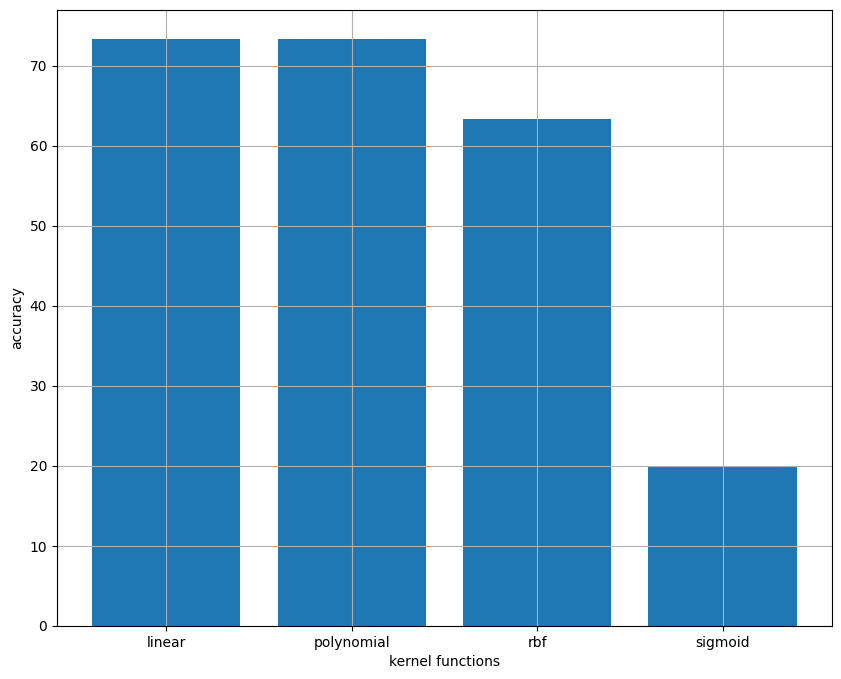

In [17]:
plt.figure(figsize=(10,8))
plt.grid()
plt.bar(kernels, acc)
plt.xlabel('kernel functions')
plt.ylabel('accuracy');

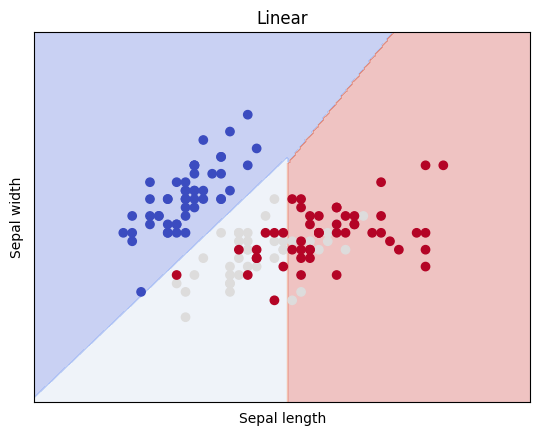

In [18]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
xx.shape


Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("Linear")
plt.show()

In [19]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [20]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [21]:
C = 1.0  # SVM regularization parameter
models = (SVC(kernel='linear', C=C),
          SVC(kernel='sigmoid'),
          SVC(kernel='rbf', gamma=0.5, C=C),
          SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

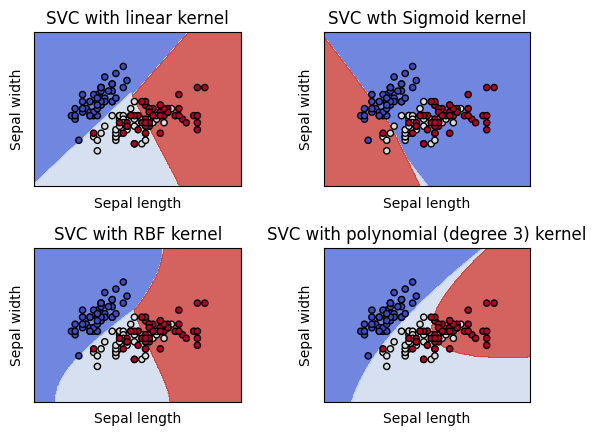

In [22]:
# title for the plots
titles = ('SVC with linear kernel',
          'SVC wth Sigmoid kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)


plt.show()

In [23]:
C = 1.0  # SVM regularization parameter
models = (SVC(kernel='rbf', gamma=0.3, C=C),
          SVC(kernel='rbf', gamma=0.5, C=C),
          SVC(kernel='rbf', gamma=0.7, C=C),
          SVC(kernel='rbf', gamma=0.9, C=C))
models = (clf.fit(X, y) for clf in models)

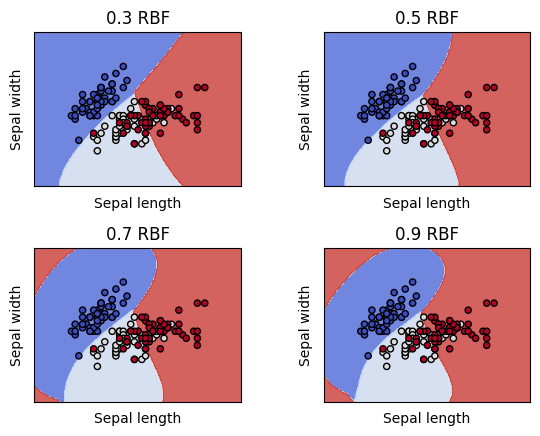

In [24]:
# title for the plots
titles = ('0.3 RBF',
          '0.5 RBF',
          '0.7 RBF',
          '0.9 RBF')
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)


plt.show()